# Data Preparation & Profiling

In [151]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Data
colnames = ['Brand','Product','Product_type','Date','Price','Quantity']
# df = pd.read_excel('beer.xlsx', names=colnames, header=None)
df = pd.read_csv('data/beer-neue-2.csv', names=colnames, header=None, encoding="utf-8",)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         116 non-null    object 
 1   Product       116 non-null    object 
 2   Product_type  116 non-null    object 
 3   Date          116 non-null    object 
 4   Price         116 non-null    float64
 5   Quantity      116 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ KB


In [154]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
df.head(10)

,Brand,Product,Product_type,Date,Price,Quantity
0,Stone & Wood,Pacific Ale Bottles 330mL,Beer,2022-03-31,24.49,25200
1,James Squire,One Fifty Lashes Pale Ale Bottles 345mL,Beer,2022-03-31,22.99,25300
2,Little Creatures,Pale Ale Bottles 330mL,Beer,2022-03-31,21.95,25100
3,Balter,XPA Cans 375mL,Beer,2022-03-31,18.99,25000
4,Mountain Goat,Very Enjoyable Beer Cans 375mL,Beer,2022-03-31,18.99,25000
5,Furphy,Refreshing Ale Bottles 375mL,Beer,2022-03-31,20.99,25000
6,Burleigh,Big Head No Carb Beer 330mL,Beer,2022-03-31,21.95,25000
7,Young Henrys,Newtowner Pale Ale Cans 375mL,Beer,2022-03-31,21.45,25000
8,Gage Roads,Single Fin Summer Ale Bottles 330mL,Beer,2022-03-31,19.95,25000
9,4 Pines,Pale Ale Bottles 330mL,Beer,2022-03-31,19.95,25000


In [156]:
df.shape

(116, 6)

# Exploratory Data Analysis

In [157]:
#Check values in different category_name
category = df['Product_type'].value_counts()
category

Beer    116
Name: Product_type, dtype: int64

In [158]:
df['ProductID'] = df['Brand'] + ' ' +  df['Product']

#Select Cereals
df_feature = df[df['Product_type']=='Beer']


#Make sure to not have any duplicates in the data
df_feature = df_feature.groupby(['Date','ProductID']).agg({'Price':'mean','Quantity': 'mean' }).reset_index()

#laptop data used for price elasticities
df_feature.head(30)

,Date,ProductID,Price,Quantity
0,2022-03-31,4 Pines Pacific Ale Bottles 330mL,18.99,25000.0
1,2022-03-31,4 Pines Pale Ale Bottles 330mL,19.95,25000.0
2,2022-03-31,Balter Captain Sensible Cans 375mL,14.95,25000.0
3,2022-03-31,Balter Eazy Hazy Can 375mL,15.99,25000.0
4,2022-03-31,Balter Hazy IPA Cans 375mL,21.49,25000.0
5,2022-03-31,Balter XPA Cans 375mL,18.99,25000.0
6,2022-03-31,BentSpoke Brewing Co. Crankshaft IPA Cans 375mL,20.99,25000.0
7,2022-03-31,Better Beer Zero Carb Lager Bottle 330ml,19.99,25000.0
8,2022-03-31,Burleigh Big Head No Carb Beer 330mL,21.95,25000.0
9,2022-03-31,Coopers Pacific Pale Ale 375mL,21.49,25000.0


In [167]:
df_feature.shape

(116, 4)

# Data Modelling

In [159]:
#Format and build a dataframe with x_values for each product within the category
x_pivot = df_feature.pivot( index='Date', columns='ProductID' ,values='Price' )
x_values = pd.DataFrame(x_pivot.to_records())
x_values.dropna()
print(x_values)

         Date  4 Pines Pacific Ale Bottles 330mL  4 Pines Pale Ale Bottles 330mL  Balter Captain Sensible Cans 375mL  Balter Eazy Hazy Can 375mL  Balter Hazy IPA Cans 375mL  Balter XPA Cans 375mL  BentSpoke Brewing Co. Crankshaft IPA Cans 375mL  Better Beer Zero Carb Lager Bottle 330ml  Burleigh Big Head No Carb Beer 330mL  ...  Mountain Goat Summer Ale Cans 375mL  Mountain Goat Very Enjoyable Beer Cans 375mL  Pirate Life Brewing South Coast Pale Ale Cans 355mL  Stone & Wood Pacific Ale Bottles 330mL  Stone & Wood Pacific Ale Cans 375mL  White Rabbit Dark Ale 330mL  Yak Brewing Fat Yak Original Pale Ale Bottle 345mL  Yak Brewing Wild Yak Pacific Ale Bottle 6 x 345mL  Young Henrys Natural Lager Can 375mL  Young Henrys Newtowner Pale Ale Cans 375mL
0  2022-03-31                              18.99                           19.95                               14.95                       15.99                       21.49                  18.99                                            20.9

In [160]:
#Format and build a dataframe with y_values for each product within the category
y_pivot = df_feature.pivot( index='Date', columns='ProductID' ,values='Quantity' )
y_values = pd.DataFrame(y_pivot.to_records())
y_values.dropna()
print(y_values)

         Date  4 Pines Pacific Ale Bottles 330mL  4 Pines Pale Ale Bottles 330mL  Balter Captain Sensible Cans 375mL  Balter Eazy Hazy Can 375mL  Balter Hazy IPA Cans 375mL  Balter XPA Cans 375mL  BentSpoke Brewing Co. Crankshaft IPA Cans 375mL  Better Beer Zero Carb Lager Bottle 330ml  Burleigh Big Head No Carb Beer 330mL  ...  Mountain Goat Summer Ale Cans 375mL  Mountain Goat Very Enjoyable Beer Cans 375mL  Pirate Life Brewing South Coast Pale Ale Cans 355mL  Stone & Wood Pacific Ale Bottles 330mL  Stone & Wood Pacific Ale Cans 375mL  White Rabbit Dark Ale 330mL  Yak Brewing Fat Yak Original Pale Ale Bottle 345mL  Yak Brewing Wild Yak Pacific Ale Bottle 6 x 345mL  Young Henrys Natural Lager Can 375mL  Young Henrys Newtowner Pale Ale Cans 375mL
0  2022-03-31                            25000.0                         25000.0                             25000.0                     25000.0                     25000.0                25000.0                                          25000.

In [161]:
points = []
results_values = {
    "ProductID": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
}
#Append x_values with y_values per same product name
for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    

    #Linear Regression Model
    import statsmodels.api as sm
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    

    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.50:
        
        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        tintercept, t_score = result.tvalues
     
        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)    
            
        #Append results into dictionary for dataframe
        results_values["ProductID"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values['t_score'].append(t_score)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        
final_df = pd.DataFrame.from_dict(results_values)

print(result.f_pvalue)
print(final_df)


nan
Empty DataFrame
Columns: [ProductID, price_elasticity, price_mean, quantity_mean, intercept, t_score, slope, coefficient_pvalue]
Index: []


In [162]:
df_elasticity = final_df[['ProductID','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept']]
df_elasticity

,ProductID,price_elasticity,t_score,coefficient_pvalue,slope,price_mean,quantity_mean,intercept


In [163]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

# Result

In [164]:
df_elasticity

,ProductID,price_elasticity,t_score,coefficient_pvalue,slope,price_mean,quantity_mean,intercept


In [165]:
df_sample = df_elasticity.head(10).append(df_elasticity.tail(10))
df_sample

,ProductID,price_elasticity,t_score,coefficient_pvalue,slope,price_mean,quantity_mean,intercept


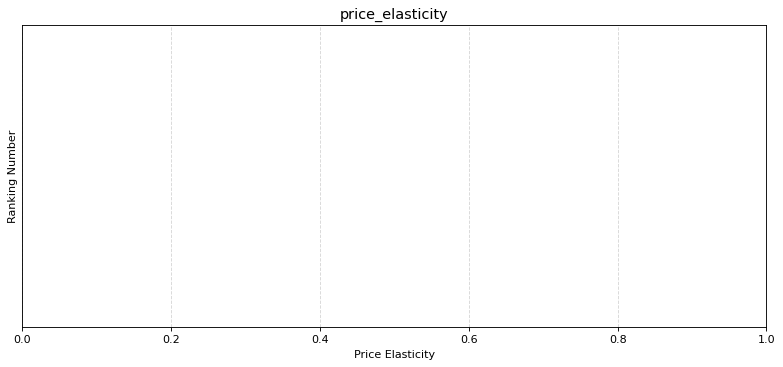

,ProductID,price_elasticity
ranking,,


In [166]:
pe_plot = divergent_plot(df_sample, 'price_elasticity', 'Ranking Number', 'Price Elasticity')

* Elasticities between 0- 1 are considered inelastic, as a result the products from rank 1 to 20 are elastic.
* Negative Price Elasticities are located from rank 1 to 20 and this would tell us the likelihood of when price decreases how likely sales demand would increase or vice versa.
* For instance, let’s analyze C1021 located in rank 11 with a negative price elasticity of -1.867437 ; a 10% price decrease in C1021, it increases sales demand by 18.67% or a 10% price increase in C1021, it decreases sales demand by 18.67%